# **Purpose**
The purpose of this report is to analyze how Facebook connects and uses your information with non-Facebook apps.

In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [2]:
with open(r"C:\Users\Dave\Dropbox\College\Data in Emerging Media and Technologies\Facebook Data\facebook-davidsilva100046_toshare\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

In [3]:
type(act['off_facebook_activity'])

list

In [4]:
act['off_facebook_activity'][0]

{'name': 'U.S. Bank - Inspired by customers',
 'events': [{'id': 1591992844216198,
   'type': 'ACTIVATE_APP',
   'timestamp': 1594274368},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594239280},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594156238},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594066670},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593919348},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593652182},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593651360},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593273365},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593127728},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593100373},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593095964},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1592933608},
  {'id': 15919

In [5]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [6]:
act['off_facebook_activity'][0]['events'][0]['type']

'ACTIVATE_APP'

In [7]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'ACTIVATE_APP'

True

In [8]:
apps_requests = [x['name'] for x in act['off_facebook_activity']]
all_event_count = [len(x['events']) for x in act['off_facebook_activity']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in act['off_facebook_activity']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in act['off_facebook_activity']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in act['off_facebook_activity']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in act['off_facebook_activity']]
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in act['off_facebook_activity']]
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in act['off_facebook_activity']]

In [9]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [10]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,0
1,"Egg, Inc.",165,109,0,0,0,35,0
2,AP News,465,133,325,0,0,7,0
3,TikTok - Make Your Day,371,99,267,5,0,0,0
4,uoregon.edu,1,0,0,0,0,0,1


**Data Visualization**

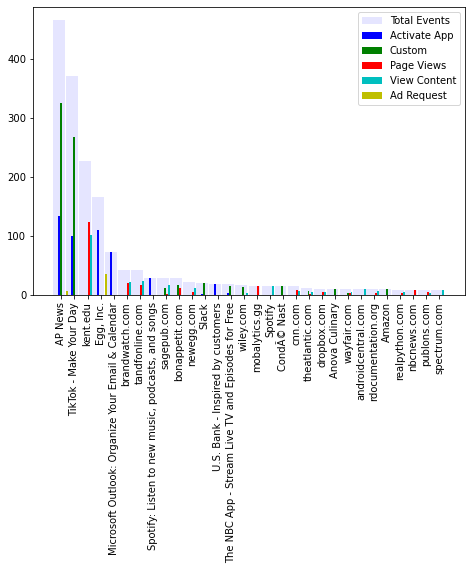

In [11]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'b', alpha = .1, width = .90)
ax.bar(X + 0.00, appbyevent['Activate App'][0:30], color='b', width = .15)
ax.bar(X + 0.15, appbyevent['Custom'][0:30], color='g', width = .15)
ax.bar(X + 0.30, appbyevent['Page Views'][0:30], color='r', width = .15)
ax.bar(X + 0.45, appbyevent['View Content'][0:30], color='c', width = .15)
ax.bar(X+.60, appbyevent['Ad Request'][0:30], color = 'y', width = .15)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events' ,'Activate App', 'Custom', 'Page Views', 'View Content', 'Ad Request'])
plt.show()